## Setup<div class='tocSkip'/>

Install required libraries.

In [6]:
import sys, os, json

## Load Python Settings<div class="tocSkip"/>

Common imports, defaults for formatting in Matplotlib, Pandas etc.

In [7]:
# path to import packages
sys.path.append(r'C:\Users\athar\Desktop\Everything\Dissertation\Sentiment analysis\Final\final_code\packages')

import pandas as pd
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

# Sentiment Analysis

# Customer Reviews Dataset

In [8]:
file = "reviews.json.gz"
file = r"C:\Users\athar\Desktop\Everything\Dissertation\Sentiment analysis\Final\final_code\data\reviews.json.gz"
df = pd.read_json(file, lines=True)
df = df.drop(columns=['reviewTime','unixReviewTime']) ### Removing unnecessary columns /data
df = df.rename(columns={'reviewText': 'text'}) ### Renaming reviewText to text
df.sample(5, random_state=12)

overall  verified      reviewerID        asin  \
163807        5     False  A2A8GHFXUG1B28  B0045Z4JAI   
195640        5      True  A1VU337W6PKAR3  B00K0TIC56   
167820        4      True  A1Z5TT1BBSDLRM  B0012ORBT6   
104268        1     False   A4PRXX2G8900X  B005SPI45U   
51961         1      True   AYETYLNYDIS2S  B00D1HLUP8   

                                                     text  \
163807  Good Decaf... it has a good flavour for a deca...   
195640  I could not ask for a better system for my sma...   
167820  good product at a good price and saves a trip ...   
104268  I like the principle of a raw chip - something...   
51961      Fake China knockoff, you get what you pay for.   

                                                  summary  
163807                                              Nice!  
195640  I could not ask for a better system for my sma...  
167820                                         Four Stars  
104268       No better alternatives but still tastes bad.  
51961                                  Definitely not OEM

# Sentiment Analysis using Lexicon based approaches

## Bing Liu Lexicon

In [4]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:5])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:5])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']


In [5]:
# Creating a dictionary which we can use for scoring our review text
nltk.download('punkt')
df.rename(columns={"reviewText": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
        
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score
        
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
df['Bing_Liu_Score'] = df['text'].apply(bing_liu_score)
df[['asin','text','Bing_Liu_Score']].sample(10, random_state=0)

asin                                               text  \
188097  B00099QWOU                                        As expected   
184654  B000RW1XO8                               Works as designed...   
231455  B000182BBC                                 highly recommended   
268912  B000COCTXA       it fits to my pickup, now i can see the road   
8011    B0009IBJBM                                Didn't work at all.   
41290   B00HQZASRW  Already changed it out for the better built Ma...   
23334   B00CZ46H7Y  Not a huge fan, the hose is cheap and will kin...   
177485  B00R9IMKCC  Haven't installed it yet, but looks and feels ...   
266434  B00P0V7GTM          As always another great from a great band   
199130  B000V66URU                        I love the tune and artist.   

        Bing_Liu_Score  
188097        0.000000  
184654        0.250000  
231455        0.500000  
268912        0.000000  
8011          0.166667  
41290         0.105263  
23334        -0.090909  
177485        0.153846  
266434        0.250000  
199130        0.142857

In [7]:
df['Bing_Liu_Score'] = preprocessing.scale(df['Bing_Liu_Score'])
df.groupby('overall').agg({'Bing_Liu_Score':'mean'})

Bing_Liu_Score
overall                
1             -0.587784
2             -0.427183
4              0.345291
5              0.529736

# Supervised Learning

## Preparing data for a supervised learning approach

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

file = "reviews.json.gz"
file = r"C:\Users\athar\Desktop\Everything\Dissertation\Sentiment analysis\Final\final_code\data\reviews.json.gz" # location
df = pd.read_json(file, lines=True)
df = df.rename(columns={'reviewText': 'text'})

# Assigning a new [1,0] target class label based on the product rating
df['sentiment'] = 0
df.loc[df['overall'] > 3, 'sentiment'] = 1
df.loc[df['overall'] < 3, 'sentiment'] = 0

# Removing unecessary columns to keep a simple dataframe 
df.drop(columns=[
    'reviewTime', 'unixReviewTime', 'reviewerID', 'summary'],
        inplace=True)
df.sample(20)

overall  verified        asin  \
196914        5      True  B00V7A4HI8   
92932         2      True  B005CV7W58   
235474        5     False  B000FZYMJK   
107967        1      True  B0002HU8G2   
124032        2      True  B0015AMEHG   
128762        1      True  B0067N7CXC   
35964         1      True  B000C34L9G   
266139        5      True  B00006IEFO   
249425        5      True  B00A3H174S   
92137         1      True  B004HK46C2   
108071        2      True  B0007P3528   
274438        4      True  B00T5C5LX0   
30436         2      True  B00VNJ4PEO   
173050        5      True  B001L1J0QW   
25129         1     False  B00GRSOJSS   
80330         1      True  B009JBGAMI   
268321        5      True  B004INLKKE   
151046        5      True  B007AQF0WK   
37995         2      True  B001O0VPBI   
73307         1      True  B015KL3JPQ   

                                                                                                                                                                                                                                                                                                    text  \
196914                                                                                                                                                                                                                                             HAVE NO CHOICE BUT TO PURCHASE WHAT MY PRINTER TAKES.   
92932                                                                                                                                                                                                                                                                                         Too sweet.   
235474                                                                                                                                                                                                                                                                            Good product and taste   
107967  this mouthpiece is very bad quality,you cannot hold out a steady note with this and is pretty hard to play.my old one is doesn't even have a brand and is much better.all the products i bought from Rico sucks and i will not be buying from them again.fortunately i was able to get a refund.   
124032                                                                                                                                                                                                                                                                                       didn't work   
128762                                                                                                                                                                                                                                                                                      Doesn't work   
35964                                                                                                                            Did not fit a Eagle Talon and I waited past 30 days sent back  Pulley is way to big and the bolt was to big to use the sleeve they sent and not big enough with sleeve.   
266139                                                                                                                                                                                                                                                   Great pastels for learners and great price too!   
249425                                                                                                                                                                                                                                                                  Item came quick and fits perfect   
92137                                                                                                                                             

# Vectorizing text data and applying a supervised machine learning algorithm

## Data Preparation

In [9]:
from preparation import clean
df['text_orig'] = df['text'].copy()
df['text'] = df['text'].apply(clean)

In [10]:
# First method that performs Tokenization and Lemmatization
# This can take longer to run due to the size of the dataset!
import textacy
import spacy
from spacy.lang.en import STOP_WORDS as stop_words
nlp = spacy.load('en_core_web_lg')

def extract_lemmas(doc, **kwargs):
    return [t.lemma_ for t in textacy.extract.words(doc,
                                                    filter_stops = False,
                                                    filter_punct = True,
                                                    filter_nums = True,
                                                    include_pos = ['ADJ', 'NOUN', 'VERB', 'ADV'],
                                                    exclude_pos = None,
                                                    min_freq = 1)]

def clean_text(text):
    doc = nlp(text)
    lemmas = extract_lemmas(doc)
    return ' '.join(lemmas)

In [11]:
# Alternate method that uses Wordnet POS tags instead of spaCy - can run faster with similar accuracy
# Tokenization and Lemmatization using wordnet. 
# Uses wordnet POS tags instead of spaCy
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
df["text"] = df["text"].apply(clean_text)

## Remove observations that are empty after the cleaning step
df = df[df['text'].str.len() != 0]

## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['sentiment'])

print ('Size of Training Data ', X_train.shape[0])
print ('Size of Test Data ', X_test.shape[0])

print ('Distribution of classes in Training Data :')
print ('Positive Sentiment ', str(sum(Y_train == 1)/ len(Y_train) * 100.0))
print ('Negative Sentiment ', str(sum(Y_train == 0)/ len(Y_train) * 100.0))

print ('Distribution of classes in Testing Data :')
print ('Positive Sentiment ', str(sum(Y_test == 1)/ len(Y_test) * 100.0))
print ('Negative Sentiment ', str(sum(Y_test == 0)/ len(Y_test) * 100.0))

Size of Training Data  234108
Size of Test Data  58527
Distribution of classes in Training Data :
Positive Sentiment  50.90770071932612
Negative Sentiment  49.09229928067388
Distribution of classes in Testing Data :
Positive Sentiment  50.9081278726058
Negative Sentiment  49.09187212739419


## Text Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,1))
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

## Training the Machine Learning model

In [15]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV,calibration_curve
from sklearn import metrics

import matplotlib.pyplot as plt

In [16]:
np.random.seed(42)

In [17]:
X, y = make_classification(n_samples=9000,n_features=20,class_sep=0.5)

In [18]:
clf = LinearSVC(random_state=42, tol=1e-5)
clf.fit(X_train_tf,Y_train)

LinearSVC(random_state=42, tol=1e-05)

<Figure size 432x288 with 0 Axes>

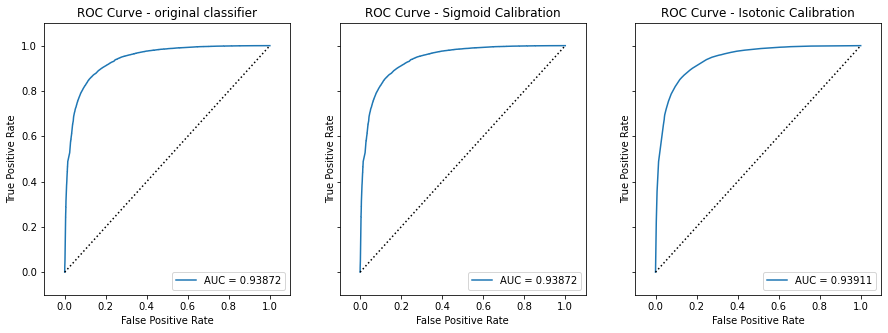

In [19]:
plt.clf()

fig,axes = plt.subplots(1,3,sharey=True)

Y_preds = clf.decision_function(X_test_tf)

clf_preds = Y_preds.reshape(-1,1)

fpr, tpr, _ = metrics.roc_curve(Y_test, clf_preds)

auc_score = metrics.auc(fpr, tpr)

axes[0].set_title('ROC Curve - original classifier')
axes[0].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[0].plot([0,1],[0,1],'k:')

axes[0].set_xlim([-0.1,1.1])
axes[0].set_ylim([-0.1,1.1])
axes[0].set_ylabel('True Positive Rate')
axes[0].set_xlabel('False Positive Rate')

axes[0].legend(loc='lower right')


## CCV sigmoid

ccv_sig = CalibratedClassifierCV(clf,method='sigmoid',cv='prefit')
ccv_sig.fit(X_train_tf,Y_train)

Y_preds = ccv_sig.predict_proba(X_test_tf)

ccv_preds_sig = Y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(Y_test, ccv_preds_sig)

auc_score = metrics.auc(fpr, tpr)

axes[1].set_title('ROC Curve - Sigmoid Calibration')
axes[1].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[1].plot([0,1],[0,1],'k:')

axes[1].set_xlim([-0.1,1.1])
axes[1].set_ylim([-0.1,1.1])
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')

axes[1].legend(loc='lower right')


## CCV isotonic

ccv_iso = CalibratedClassifierCV(clf,method='isotonic',cv='prefit')
ccv_iso.fit(X_train_tf,Y_train)

Y_preds = ccv_iso.predict_proba(X_test_tf)

ccv_preds_iso = Y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(Y_test, ccv_preds_iso)

auc_score = metrics.auc(fpr, tpr)

axes[2].set_title('ROC Curve - Isotonic Calibration')
axes[2].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[2].plot([0,1],[0,1],'k:')

axes[2].set_xlim([-0.1,1.1])
axes[2].set_ylim([-0.1,1.1])
axes[2].set_ylabel('True Positive Rate')
axes[2].set_xlabel('False Positive Rate')

axes[2].legend(loc='lower right')


plt.gcf().set_size_inches(15,5)
plt.show()

In [20]:
clf_preds

array([[ 1.00421452],
       [-1.06819622],
       [-0.10175856],
       ...,
       [ 0.22435047],
       [ 0.38337199],
       [-2.56946531]])

In [21]:
clf_preds.max()

3.634921100846901

In [22]:
clf_preds.min()

-3.7151716511719712

In [23]:
clf_preds_normalized = (clf_preds+(clf_preds.min()*-1))
clf_preds_normalized = clf_preds_normalized/clf_preds_normalized.max()

In [24]:
clf_preds_normalized.max()

1.0

<Figure size 432x288 with 0 Axes>

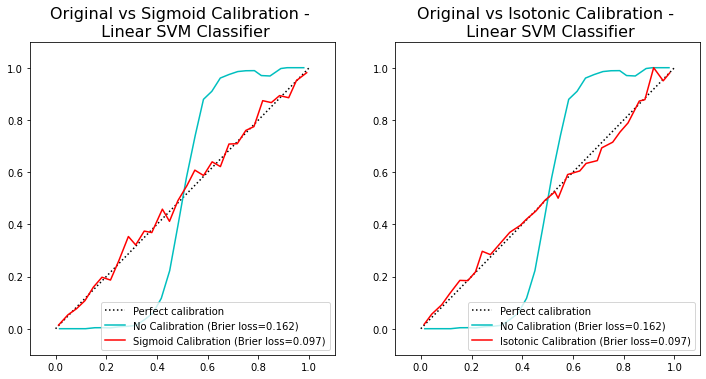

In [25]:
plt.clf()

fig, axes = plt.subplots(1,2)

ax=axes[0]

ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])

ax.plot([0, 1], [0, 1], "k:", label="Perfect calibration")

clf_score = brier_score_loss(Y_test, clf_preds_normalized, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, clf_preds_normalized, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "c-", label="No Calibration (Brier loss={:.3f})".format(clf_score))

clf_score = brier_score_loss(Y_test, ccv_preds_sig, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, ccv_preds_sig, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "r-", label="Sigmoid Calibration (Brier loss={:.3f})".format(clf_score))

ax.legend(loc='lower right')
ax.set_title('Original vs Sigmoid Calibration - \n Linear SVM Classifier', size=16)
plt.subplots_adjust(top=0.85)


## ax 2

ax=axes[1]

ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])

ax.plot([0, 1], [0, 1], "k:", label="Perfect calibration")

clf_score = brier_score_loss(Y_test, clf_preds_normalized, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, clf_preds_normalized, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "c-", label="No Calibration (Brier loss={:.3f})".format(clf_score))

clf_score = brier_score_loss(Y_test, ccv_preds_iso, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, ccv_preds_iso, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "r-", label="Isotonic Calibration (Brier loss={:.3f})".format(clf_score))

ax.legend(loc='lower right')
ax.set_title('Original vs Isotonic Calibration - \n Linear SVM Classifier', size=16)
plt.subplots_adjust(top=0.85)

plt.gcf().set_size_inches(12,6)
plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

Y_preds = clf.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_preds))
print ('ROC-AUC Score - ', roc_auc_score(Y_test, Y_preds))

Accuracy Score -  0.8658396979172006
ROC-AUC Score -  0.8660667427476778


In [27]:
sample_reviews = df.sample(5, random_state=22)
sample_reviews_tf = tfidf.transform(sample_reviews['text'])
sentiment_predictions = clf.predict(sample_reviews_tf)
sentiment_predictions = pd.DataFrame(data = sentiment_predictions,
                                     index=sample_reviews.index,
                                     columns=['sentiment_prediction'])
sample_reviews = pd.concat([sample_reviews, sentiment_predictions], axis=1)
print ('Some sample reviews with their sentiment - ')
sample_reviews[['text_orig','sentiment_prediction']]

Some sample reviews with their sentiment - 


text_orig  \
29500                   Its a nice night light, but not much else apparently!   
98387       Way to small, do not know what to do with them or how to use them   
113648  Didn't make the room "blue" enough - returned with no questions asked   
281527                                                              Excellent   
233713                                            fit like oem and looks good   

        sentiment_prediction  
29500                      1  
98387                      0  
113648                     0  
281527                     1  
233713                     1

In [28]:
def baseline_scorer(text):
    score = bing_liu_score(text)
    if score > 0:
        return 1
    else:
        return 0
    
Y_pred_baseline = X_test.apply(baseline_scorer)
acc_score = accuracy_score(Y_pred_baseline, Y_test)
print (acc_score)

0.7525073897517385


# Pre-trained Language Models using deep learning

## Deep Learning and Transfer Learning


# Using transfer learning technique and a pre-trained language model

In [29]:
# This is an optional step to reduce the size of the data by sampling only 40% of the observations
# It is very useful to conduct a first run using a GPU
# Lager number of observations can cause longer runtime
df = df.sample(frac=0.4, random_state=42)

## Loading models and tokenization

In [30]:
from transformers import BertConfig, BertTokenizer, BertForSequenceClassification

config = BertConfig.from_pretrained('bert-base-uncased', finetuning_task='binary')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [31]:
# There is a change in behavior of the truncation while calling the encode function. 
# This produces a warning and the behavior will probably change in future

import warnings;
warnings.filterwarnings('ignore');

def get_tokens(text, tokenizer, max_seq_length, add_special_tokens=True):
  input_ids = tokenizer.encode(text, 
                               add_special_tokens=add_special_tokens, 
                               max_length=max_seq_length,
                               pad_to_max_length=True)
  attention_mask = [int(id > 0) for id in input_ids]
  assert len(input_ids) == max_seq_length
  assert len(attention_mask) == max_seq_length
  return (input_ids, attention_mask)

text = "This is a really good movie."
input_ids, attention_mask = get_tokens(text, 
                                       tokenizer, 
                                       max_seq_length=30, 
                                       add_special_tokens = True)
input_tokens = tokenizer.convert_ids_to_tokens(input_ids)
print (text)
print (input_tokens)
print (input_ids)
print (attention_mask)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


This is a really good movie.
['[CLS]', 'this', 'is', 'a', 'really', 'good', 'movie', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[101, 2023, 2003, 1037, 2428, 2204, 3185, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text_orig'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['sentiment'])
X_train_tokens = X_train.apply(get_tokens, args=(tokenizer, 50))
X_test_tokens = X_test.apply(get_tokens, args=(tokenizer, 50))

<AxesSubplot:>

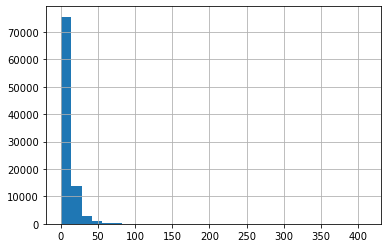

In [33]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in X_train]

pd.Series(seq_len).hist(bins = 30)

In [34]:
import torch
from torch.utils.data import TensorDataset

input_ids_train = torch.tensor(
    [features[0] for features in X_train_tokens.values], dtype=torch.long)
input_mask_train = torch.tensor(
    [features[1] for features in X_train_tokens.values], dtype=torch.long)
label_ids_train = torch.tensor(Y_train.values, dtype=torch.long)

print (input_ids_train.shape)
print (input_mask_train.shape)
print (label_ids_train.shape)

torch.Size([93643, 50])
torch.Size([93643, 50])
torch.Size([93643])


In [35]:
input_ids_train[2]

tensor([  101, 10140,  2021,  2074,  2205,  2235,  2130,  2005, 10514,  9468,
        27581,  2015,  1012,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [36]:
train_dataset = TensorDataset(input_ids_train,input_mask_train,label_ids_train)

In [37]:
input_ids_test = torch.tensor([features[0] for features in X_test_tokens.values], 
                              dtype=torch.long)
input_mask_test = torch.tensor([features[1] for features in X_test_tokens.values], 
                               dtype=torch.long)
label_ids_test = torch.tensor(Y_test.values, 
                              dtype=torch.long)
test_dataset = TensorDataset(input_ids_test, input_mask_test, label_ids_test)

## Model Training

In [38]:
from torch.utils.data import DataLoader, RandomSampler

train_batch_size = 64
num_train_epochs = 2

train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, 
                              sampler=train_sampler, 
                              batch_size=train_batch_size)
t_total = len(train_dataloader) // num_train_epochs

print ("Num examples = ", len(train_dataset))
print ("Num Epochs = ", num_train_epochs)
print ("Total train batch size  = ", train_batch_size)
print ("Total optimization steps = ", t_total)

Num examples =  93643
Num Epochs =  2
Total train batch size  =  64
Total optimization steps =  732


In [39]:
from transformers import AdamW, get_linear_schedule_with_warmup

learning_rate = 1e-4
adam_epsilon = 1e-8
warmup_steps = 0

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=adam_epsilon)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=warmup_steps, 
                                            num_training_steps=t_total)

In [40]:
from tqdm import trange, notebook

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_iterator = trange(num_train_epochs, desc="Epoch")

## Put model in 'train' mode
model.train()
    
for epoch in train_iterator:
    epoch_iterator = notebook.tqdm(train_dataloader, desc="Iteration")
    for step, batch in enumerate(epoch_iterator):

        ## Reset all gradients at start of every iteration
        model.zero_grad()
        
        ## Put the model and the input observations to GPU
        model.to(device)
        batch = tuple(t.to(device) for t in batch)
        
        ## Identify the inputs to the model
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        ## Forward Pass through the model. Input -> Model -> Output
        outputs = model(**inputs)

        ## Determine the deviation (loss)
        loss = outputs[0]
        print("\r%f" % loss, end='')

        ## Back-propogate the loss (automatically calculates gradients)
        loss.backward()

        ## Prevent exploding gradients by limiting gradients to 1.0 
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        ## Update the parameters and learning rate
        optimizer.step()
        scheduler.step()

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1464 [00:00<?, ?it/s]

0.251026

Epoch:  50%|█████     | 1/2 [07:16<07:16, 436.99s/it]

0.194559

Iteration:   0%|          | 0/1464 [00:00<?, ?it/s]

0.047268

Epoch: 100%|██████████| 2/2 [14:34<00:00, 437.38s/it]

0.377075

In [41]:
model.save_pretrained('outputs')

## Model Evaluation

In [42]:
import numpy as np
from torch.utils.data import SequentialSampler

test_batch_size = 64
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, 
                             sampler=test_sampler, 
                             batch_size=test_batch_size)

# Load the pre-trained model that was saved earlier 
model = model.from_pretrained(r'C:\Users\athar\Desktop\Everything\Dissertation\Sentiment analysis\Final\final_code\sentiment_analysis\outputs')

# Initialize the prediction and actual labels
preds = None
out_label_ids = None

## Put model in "eval" mode
model.eval()

for batch in notebook.tqdm(test_dataloader, desc="Evaluating"):
    
    ## Put the model and the input observations to GPU
    model.to(device)
    batch = tuple(t.to(device) for t in batch)
    
    ## Do not track any gradients since in 'eval' mode
    with torch.no_grad():
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        ## Forward pass through the model
        outputs = model(**inputs)

        ## We get loss since we provided the labels
        tmp_eval_loss, logits = outputs[:2]

        ## There maybe more than one batch of items in the test dataset
        if preds is None:
            preds = logits.detach().cpu().numpy()
            out_label_ids = inputs['labels'].detach().cpu().numpy()
        else:
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(out_label_ids, 
                                      inputs['labels'].detach().cpu().numpy(), 
                                      axis=0)
    
## Get final loss, predictions and accuracy
preds = np.argmax(preds, axis=1)
acc_score = accuracy_score(preds, out_label_ids)
print ('Accuracy Score on Test data ', acc_score)

Evaluating:   0%|          | 0/366 [00:00<?, ?it/s]

Accuracy Score on Test data  0.9458801418136773


In [9]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [10]:
# Product Scores
fig = px.histogram(df, x="overall")
fig.update_traces(marker_color="pink",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()